# Black Marble PY

Short intro notebook to showcase how to use the Black Marble dataset.

## Authorization

In order to access the data, we need to authorize to the server with a special token called a "Bearer token". This is conveniently stored as an environment variable in the Conda environment (assuming you have followed the setup instructions from the `README.md`). We get the token here for use later in the code.

This notebook is based on the documentation of the `blackmarblepy` package. You can look through it here: <https://worldbank.github.io/blackmarblepy/notebooks/blackmarblepy.html>

In [15]:
import os
from pathlib import Path

# Directory to download files to (ignore in git)
DATA_DIR = Path('../data')

# Get Bearer token from environment
BEARER_TOKEN = os.getenv("BLACKMARBLE_TOKEN") or ""
assert (
    BEARER_TOKEN != ""
), "BLACKMARBLE_TOKEN not defined! Please set this environment variable or use the provided Conda environment."

## Area of Interest

Next, we need to define a geographic area of interest. You can get the necessary file from [GADM](https://gadm.org/download_country.html). There, choose the area of interest, and then look for `GeoJSON: level1`, right-click the link and select "Copy Link URL" (or similar). Then paste it in the cell below.

In [16]:
# We download the file locally to avoid having to download it every time
GDF_URL = "https://geodata.ucdavis.edu/gadm/gadm4.1/json/gadm41_MMR_1.json.zip"
GDF_DOWNLOAD_PATH = DATA_DIR / 'gdf.json.zip'

if not GDF_DOWNLOAD_PATH.exists():
    os.system(f"wget -O {GDF_DOWNLOAD_PATH} {GDF_URL}")
    print("Data downloaded")
else:
    print("Already downloaded, skipping...")

Already downloaded, skipping...


In [17]:
import geopandas

gdf = geopandas.read_file(GDF_DOWNLOAD_PATH)
gdf.explore(tiles="CartoDB dark_matter")

In [41]:
from datetime import date
from blackmarble.raster import bm_raster
from blackmarble.types import Product

# Create output directory
BLACKMARBLE_OUTPUT_DIR = DATA_DIR / "blackmarble"
BLACKMARBLE_OUTPUT_DIR.mkdir(parents=True, exist_ok=True)

# Daily data: raster for February 5, 2021
VNP46A2_20181021 = bm_raster(
    gdf,
    product_id=Product.VNP46A2,
    date_range=date.fromisoformat("2018-10-21"),
    bearer=BEARER_TOKEN,
    output_directory=BLACKMARBLE_OUTPUT_DIR
)
VNP46A2_20181021



GETTING MANIFEST...:   0%|          | 0/4 [00:00<?, ?it/s]

QUEUEING TASKS | Downloading...:   0%|          | 0/4 [00:00<?, ?it/s]

PROCESSING TASKS | Downloading...:   0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0.00/2.49M [00:00<?, ?B/s]

  0%|          | 0.00/6.01M [00:00<?, ?B/s]

  0%|          | 0.00/3.77M [00:00<?, ?B/s]

  0%|          | 0.00/2.81M [00:00<?, ?B/s]

COLLECTING RESULTS | Downloading...:   0%|          | 0/4 [00:00<?, ?it/s]

COLLATING RESULTS | Processing...:   0%|          | 0/1 [00:00<?, ?it/s]

<xarray.Dataset> Size: 13MB
Dimensions:                            (x: 1071, y: 1544, time: 1)
Coordinates:
  * x                                  (x) float64 9kB -3.26 -3.256 ... 1.198
  * y                                  (y) float64 12kB 11.17 11.17 ... 4.744
  * time                               (time) datetime64[ns] 8B 2018-10-21
Data variables:
    Gap_Filled_DNB_BRDF-Corrected_NTL  (time, y, x) float64 13MB nan nan ... nan
Attributes: (12/41)
    AlgorithmType:                     b'SCI'
    DataResolution:                    b'Moderate'
    DayNightFlag:                      b'Day'
    EastBoundingCoord:                 0.0
    EndTime:                           b'2018-10-21 23:59:59.000'
    GranuleDayNightFlag:               b'Day'
    ...                                ...
    VersionID:                         b'001'
    VerticalTileNumber:                b'07'
    WestBoundingCoord:                 -10.0
    AREA_OR_POINT:                     Area
    scale_factor:                      1.0
    add_offset:                        0.0

In [13]:
!pip install colorcet contextily geopandas matplotlib seaborn pandas folium mapclassify

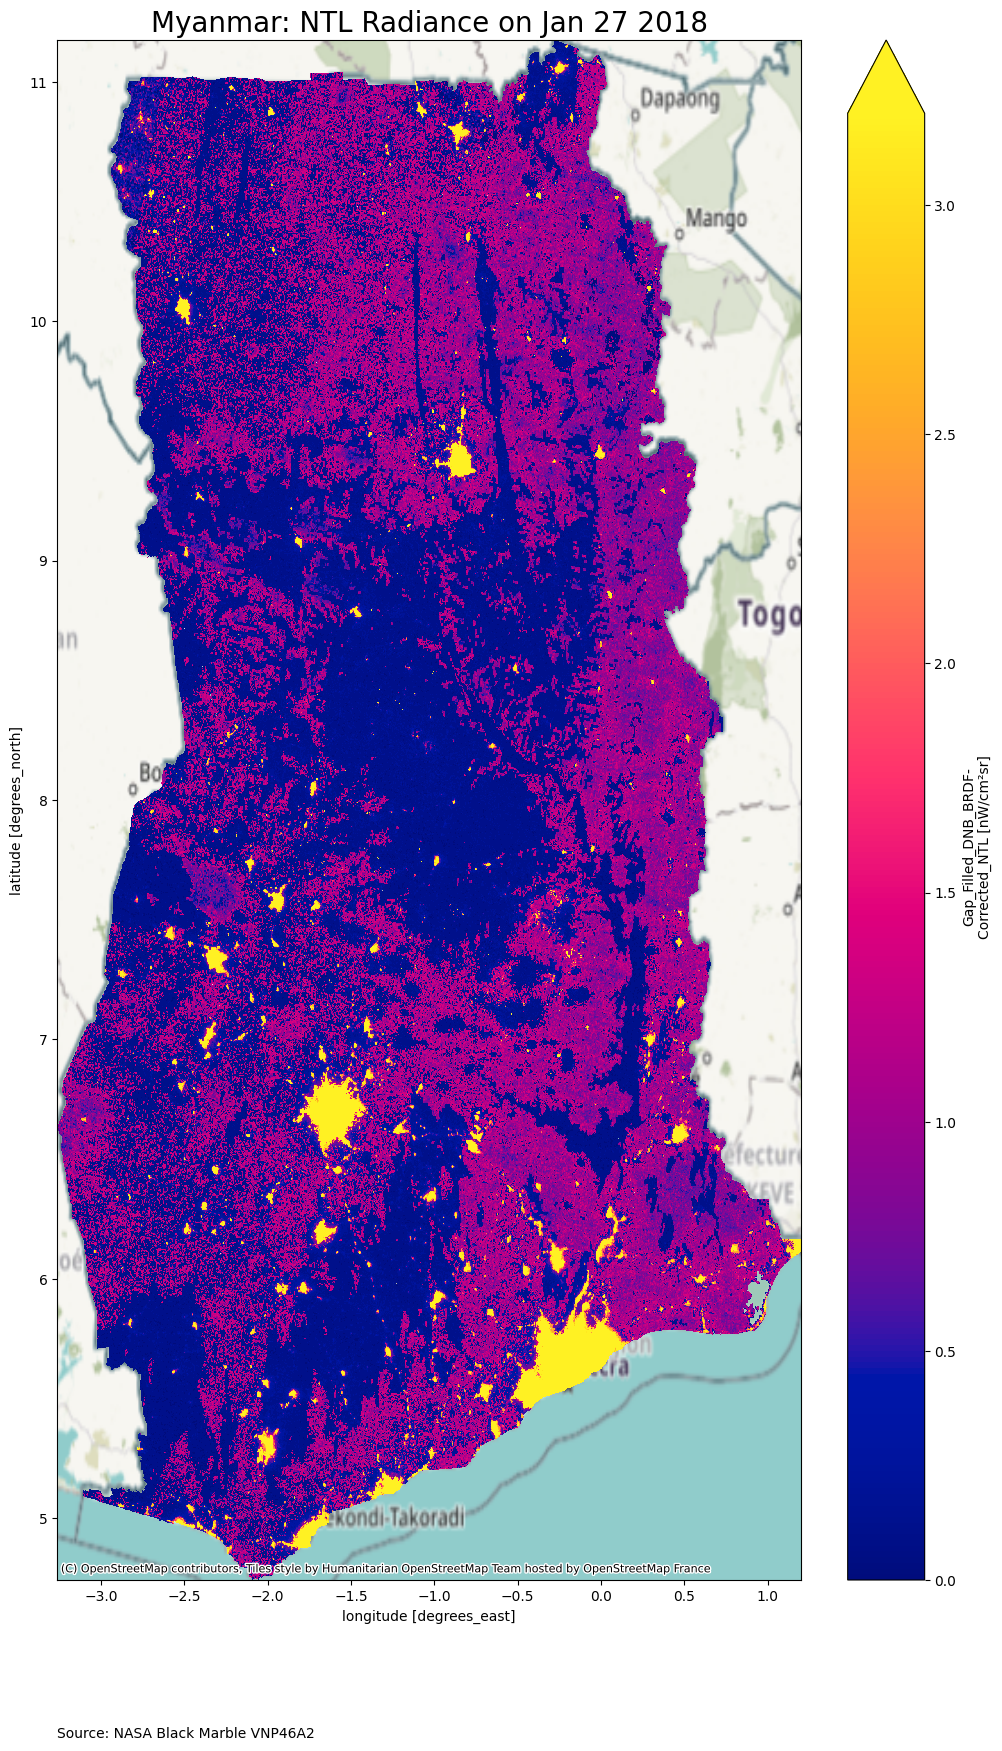

In [14]:
import matplotlib.pyplot as plt
import colorcet as cc
import contextily as cx

fig, ax = plt.subplots(figsize=(12, 20))

VNP46A2_20180127["Gap_Filled_DNB_BRDF-Corrected_NTL"].sel(
    time="2018-01-27"
).plot.pcolormesh(
    ax=ax,
    cmap=cc.cm.bmy,
    robust=True,
)
cx.add_basemap(ax, crs=gdf.crs.to_string())

ax.text(
    0,
    -0.1,
    "Source: NASA Black Marble VNP46A2",
    ha="left",
    va="center",
    transform=ax.transAxes,
    fontsize=10,
    color="black",
    weight="normal",
)
ax.set_title("Myanmar: NTL Radiance on Jan 27 2018", fontsize=20);

In [13]:
VNP46A2_20210205["Gap_Filled_DNB_BRDF-Corrected_NTL"].sel(
    time="2021-02-05"
)

<xarray.DataArray 'Gap_Filled_DNB_BRDF-Corrected_NTL' (y: 4675, x: 2161)> Size: 81MB
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], shape=(4675, 2161))
Coordinates:
  * x        (x) float64 17kB 92.17 92.18 92.18 92.19 ... 101.2 101.2 101.2
  * y        (y) float64 37kB 28.54 28.54 28.53 28.53 ... 9.073 9.069 9.065
    time     datetime64[ns] 8B 2021-02-05
Attributes:
    units:    nW/cm²sr

In [46]:
from datetime import date
from blackmarble.raster import bm_raster
from blackmarble.types import Product

# Create output directory
BLACKMARBLE_OUTPUT_DIR = DATA_DIR / "blackmarble"
BLACKMARBLE_OUTPUT_DIR.mkdir(parents=True, exist_ok=True)
CSV_PATH = "../dates_luojia_myanmar.csv"

date_to_raster = {}

with open(CSV_PATH) as f:
    for date_string in f.readlines():
        stripped_date = date_string.strip()
        if not stripped_date in date_to_raster:
            print(date_string)
            date_to_raster[stripped_date] = bm_raster(
                                    gdf,
                                    product_id=Product.VNP46A2,
                                    date_range=date.fromisoformat(stripped_date),
                                    bearer=BEARER_TOKEN,
                                    output_directory=BLACKMARBLE_OUTPUT_DIR
                                    )


        
    




2018-09-18



GETTING MANIFEST...:   0%|          | 0/4 [00:00<?, ?it/s]

QUEUEING TASKS | Downloading...:   0%|          | 0/4 [00:00<?, ?it/s]

PROCESSING TASKS | Downloading...:   0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0.00/1.93M [00:00<?, ?B/s]

  0%|          | 0.00/2.16M [00:00<?, ?B/s]

  0%|          | 0.00/3.74M [00:00<?, ?B/s]

  0%|          | 0.00/3.75M [00:00<?, ?B/s]

COLLECTING RESULTS | Downloading...:   0%|          | 0/4 [00:00<?, ?it/s]

COLLATING RESULTS | Processing...:   0%|          | 0/1 [00:00<?, ?it/s]

2018-10-04



GETTING MANIFEST...:   0%|          | 0/4 [00:00<?, ?it/s]

QUEUEING TASKS | Downloading...:   0%|          | 0/4 [00:00<?, ?it/s]

PROCESSING TASKS | Downloading...:   0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0.00/3.79M [00:00<?, ?B/s]

  0%|          | 0.00/2.57M [00:00<?, ?B/s]

  0%|          | 0.00/1.77M [00:00<?, ?B/s]

  0%|          | 0.00/3.82M [00:00<?, ?B/s]

COLLECTING RESULTS | Downloading...:   0%|          | 0/4 [00:00<?, ?it/s]

COLLATING RESULTS | Processing...:   0%|          | 0/1 [00:00<?, ?it/s]

2018-10-16



GETTING MANIFEST...:   0%|          | 0/4 [00:00<?, ?it/s]

QUEUEING TASKS | Downloading...:   0%|          | 0/4 [00:00<?, ?it/s]

PROCESSING TASKS | Downloading...:   0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0.00/1.69M [00:00<?, ?B/s]

  0%|          | 0.00/3.72M [00:00<?, ?B/s]

  0%|          | 0.00/3.40M [00:00<?, ?B/s]

  0%|          | 0.00/2.50M [00:00<?, ?B/s]

COLLECTING RESULTS | Downloading...:   0%|          | 0/4 [00:00<?, ?it/s]

COLLATING RESULTS | Processing...:   0%|          | 0/1 [00:00<?, ?it/s]

2018-10-20



GETTING MANIFEST...:   0%|          | 0/4 [00:00<?, ?it/s]

QUEUEING TASKS | Downloading...:   0%|          | 0/4 [00:00<?, ?it/s]

PROCESSING TASKS | Downloading...:   0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0.00/3.26M [00:00<?, ?B/s]

  0%|          | 0.00/2.98M [00:00<?, ?B/s]

  0%|          | 0.00/3.70M [00:00<?, ?B/s]

  0%|          | 0.00/4.32M [00:00<?, ?B/s]

COLLECTING RESULTS | Downloading...:   0%|          | 0/4 [00:00<?, ?it/s]

COLLATING RESULTS | Processing...:   0%|          | 0/1 [00:00<?, ?it/s]

2018-10-21



GETTING MANIFEST...:   0%|          | 0/4 [00:00<?, ?it/s]

QUEUEING TASKS | Downloading...:   0%|          | 0/4 [00:00<?, ?it/s]

PROCESSING TASKS | Downloading...:   0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0.00/2.81M [00:00<?, ?B/s]

  0%|          | 0.00/2.49M [00:00<?, ?B/s]

  0%|          | 0.00/6.01M [00:00<?, ?B/s]

  0%|          | 0.00/3.77M [00:00<?, ?B/s]

COLLECTING RESULTS | Downloading...:   0%|          | 0/4 [00:00<?, ?it/s]

COLLATING RESULTS | Processing...:   0%|          | 0/1 [00:00<?, ?it/s]

2018-10-29



GETTING MANIFEST...:   0%|          | 0/4 [00:00<?, ?it/s]

QUEUEING TASKS | Downloading...:   0%|          | 0/4 [00:00<?, ?it/s]

PROCESSING TASKS | Downloading...:   0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0.00/2.18M [00:00<?, ?B/s]

  0%|          | 0.00/1.43M [00:00<?, ?B/s]

  0%|          | 0.00/5.25M [00:00<?, ?B/s]

  0%|          | 0.00/3.34M [00:00<?, ?B/s]

COLLECTING RESULTS | Downloading...:   0%|          | 0/4 [00:00<?, ?it/s]

COLLATING RESULTS | Processing...:   0%|          | 0/1 [00:00<?, ?it/s]

2018-11-02



GETTING MANIFEST...:   0%|          | 0/4 [00:00<?, ?it/s]

QUEUEING TASKS | Downloading...:   0%|          | 0/4 [00:00<?, ?it/s]

PROCESSING TASKS | Downloading...:   0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0.00/1.73M [00:00<?, ?B/s]

  0%|          | 0.00/1.83M [00:00<?, ?B/s]

  0%|          | 0.00/3.90M [00:00<?, ?B/s]

  0%|          | 0.00/5.02M [00:00<?, ?B/s]

COLLECTING RESULTS | Downloading...:   0%|          | 0/4 [00:00<?, ?it/s]

COLLATING RESULTS | Processing...:   0%|          | 0/1 [00:00<?, ?it/s]

2018-11-06



GETTING MANIFEST...:   0%|          | 0/4 [00:00<?, ?it/s]

QUEUEING TASKS | Downloading...:   0%|          | 0/4 [00:00<?, ?it/s]

PROCESSING TASKS | Downloading...:   0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0.00/2.00M [00:00<?, ?B/s]

  0%|          | 0.00/2.92M [00:00<?, ?B/s]

  0%|          | 0.00/3.91M [00:00<?, ?B/s]

  0%|          | 0.00/2.21M [00:00<?, ?B/s]

COLLECTING RESULTS | Downloading...:   0%|          | 0/4 [00:00<?, ?it/s]

COLLATING RESULTS | Processing...:   0%|          | 0/1 [00:00<?, ?it/s]

2018-11-07



GETTING MANIFEST...:   0%|          | 0/4 [00:00<?, ?it/s]

QUEUEING TASKS | Downloading...:   0%|          | 0/4 [00:00<?, ?it/s]

PROCESSING TASKS | Downloading...:   0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0.00/3.00M [00:00<?, ?B/s]

  0%|          | 0.00/3.67M [00:00<?, ?B/s]

  0%|          | 0.00/1.84M [00:00<?, ?B/s]

  0%|          | 0.00/1.58M [00:00<?, ?B/s]

COLLECTING RESULTS | Downloading...:   0%|          | 0/4 [00:00<?, ?it/s]

COLLATING RESULTS | Processing...:   0%|          | 0/1 [00:00<?, ?it/s]

2018-11-18



GETTING MANIFEST...:   0%|          | 0/4 [00:00<?, ?it/s]

QUEUEING TASKS | Downloading...:   0%|          | 0/4 [00:00<?, ?it/s]

PROCESSING TASKS | Downloading...:   0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0.00/3.11M [00:00<?, ?B/s]

  0%|          | 0.00/3.32M [00:00<?, ?B/s]

  0%|          | 0.00/1.89M [00:00<?, ?B/s]

  0%|          | 0.00/6.22M [00:00<?, ?B/s]

COLLECTING RESULTS | Downloading...:   0%|          | 0/4 [00:00<?, ?it/s]

COLLATING RESULTS | Processing...:   0%|          | 0/1 [00:00<?, ?it/s]

2018-11-19



GETTING MANIFEST...:   0%|          | 0/4 [00:00<?, ?it/s]

QUEUEING TASKS | Downloading...:   0%|          | 0/4 [00:00<?, ?it/s]

PROCESSING TASKS | Downloading...:   0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0.00/2.30M [00:00<?, ?B/s]

  0%|          | 0.00/2.76M [00:00<?, ?B/s]

  0%|          | 0.00/2.63M [00:00<?, ?B/s]

  0%|          | 0.00/4.89M [00:00<?, ?B/s]

COLLECTING RESULTS | Downloading...:   0%|          | 0/4 [00:00<?, ?it/s]

COLLATING RESULTS | Processing...:   0%|          | 0/1 [00:00<?, ?it/s]

2018-11-27



GETTING MANIFEST...:   0%|          | 0/4 [00:00<?, ?it/s]

QUEUEING TASKS | Downloading...:   0%|          | 0/4 [00:00<?, ?it/s]

PROCESSING TASKS | Downloading...:   0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0.00/5.95M [00:00<?, ?B/s]

  0%|          | 0.00/2.67M [00:00<?, ?B/s]

  0%|          | 0.00/2.86M [00:00<?, ?B/s]

[2025-04-03 17:27:53 - backoff:105 - INFO] Backing off _download_file(...) for 0.3s (httpx.ReadTimeout: The read operation timed out)


COLLECTING RESULTS | Downloading...:   0%|          | 0/4 [00:00<?, ?it/s]

COLLATING RESULTS | Processing...:   0%|          | 0/1 [00:00<?, ?it/s]

OSError: Unable to synchronously open file (file signature not found)

In [48]:
with open(CSV_PATH) as f:
    for date_string in f.readlines():
        stripped_date = date_string.strip()
        if not stripped_date in date_to_raster:
            print(date_string)
            date_to_raster[stripped_date] = bm_raster(
                                    gdf,
                                    product_id=Product.VNP46A2,
                                    date_range=date.fromisoformat(stripped_date),
                                    bearer=BEARER_TOKEN,
                                    output_directory=BLACKMARBLE_OUTPUT_DIR
                                    )

2018-11-27



GETTING MANIFEST...:   0%|          | 0/4 [00:00<?, ?it/s]

QUEUEING TASKS | Downloading...:   0%|          | 0/4 [00:00<?, ?it/s]

PROCESSING TASKS | Downloading...:   0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0.00/5.95M [00:00<?, ?B/s]

  0%|          | 0.00/2.86M [00:00<?, ?B/s]

  0%|          | 0.00/2.67M [00:00<?, ?B/s]

  0%|          | 0.00/5.39M [00:00<?, ?B/s]

COLLECTING RESULTS | Downloading...:   0%|          | 0/4 [00:00<?, ?it/s]

COLLATING RESULTS | Processing...:   0%|          | 0/1 [00:00<?, ?it/s]

2018-12-12



GETTING MANIFEST...:   0%|          | 0/4 [00:00<?, ?it/s]

[2025-04-03 17:28:48 - backoff:105 - INFO] Backing off get_url(...) for 0.6s (httpx.ReadTimeout)


QUEUEING TASKS | Downloading...:   0%|          | 0/4 [00:00<?, ?it/s]

PROCESSING TASKS | Downloading...:   0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0.00/3.81M [00:00<?, ?B/s]

  0%|          | 0.00/2.57M [00:00<?, ?B/s]

  0%|          | 0.00/4.59M [00:00<?, ?B/s]

  0%|          | 0.00/2.24M [00:00<?, ?B/s]

COLLECTING RESULTS | Downloading...:   0%|          | 0/4 [00:00<?, ?it/s]

COLLATING RESULTS | Processing...:   0%|          | 0/1 [00:00<?, ?it/s]

2019-01-27



GETTING MANIFEST...:   0%|          | 0/4 [00:00<?, ?it/s]

[2025-04-03 17:28:57 - backoff:105 - INFO] Backing off get_url(...) for 0.3s (httpx.ReadTimeout)


QUEUEING TASKS | Downloading...:   0%|          | 0/4 [00:00<?, ?it/s]

PROCESSING TASKS | Downloading...:   0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0.00/3.85M [00:00<?, ?B/s]

  0%|          | 0.00/2.32M [00:00<?, ?B/s]

  0%|          | 0.00/4.04M [00:00<?, ?B/s]

  0%|          | 0.00/3.31M [00:00<?, ?B/s]

COLLECTING RESULTS | Downloading...:   0%|          | 0/4 [00:00<?, ?it/s]

COLLATING RESULTS | Processing...:   0%|          | 0/1 [00:00<?, ?it/s]

2019-02-08



GETTING MANIFEST...:   0%|          | 0/4 [00:00<?, ?it/s]

QUEUEING TASKS | Downloading...:   0%|          | 0/4 [00:00<?, ?it/s]

PROCESSING TASKS | Downloading...:   0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0.00/2.23M [00:00<?, ?B/s]

  0%|          | 0.00/3.73M [00:00<?, ?B/s]

  0%|          | 0.00/2.48M [00:00<?, ?B/s]

  0%|          | 0.00/4.10M [00:00<?, ?B/s]

COLLECTING RESULTS | Downloading...:   0%|          | 0/4 [00:00<?, ?it/s]

COLLATING RESULTS | Processing...:   0%|          | 0/1 [00:00<?, ?it/s]

2019-02-17



GETTING MANIFEST...:   0%|          | 0/4 [00:00<?, ?it/s]

QUEUEING TASKS | Downloading...:   0%|          | 0/4 [00:00<?, ?it/s]

PROCESSING TASKS | Downloading...:   0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0.00/3.69M [00:00<?, ?B/s]

  0%|          | 0.00/4.42M [00:00<?, ?B/s]

  0%|          | 0.00/7.04M [00:00<?, ?B/s]

  0%|          | 0.00/3.39M [00:00<?, ?B/s]

COLLECTING RESULTS | Downloading...:   0%|          | 0/4 [00:00<?, ?it/s]

COLLATING RESULTS | Processing...:   0%|          | 0/1 [00:00<?, ?it/s]

2019-03-01



GETTING MANIFEST...:   0%|          | 0/4 [00:00<?, ?it/s]

QUEUEING TASKS | Downloading...:   0%|          | 0/4 [00:00<?, ?it/s]

PROCESSING TASKS | Downloading...:   0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0.00/1.53M [00:00<?, ?B/s]

  0%|          | 0.00/2.02M [00:00<?, ?B/s]

  0%|          | 0.00/3.86M [00:00<?, ?B/s]

  0%|          | 0.00/3.18M [00:00<?, ?B/s]

COLLECTING RESULTS | Downloading...:   0%|          | 0/4 [00:00<?, ?it/s]

COLLATING RESULTS | Processing...:   0%|          | 0/1 [00:00<?, ?it/s]

2019-03-13



GETTING MANIFEST...:   0%|          | 0/4 [00:00<?, ?it/s]

[2025-04-03 17:29:23 - backoff:105 - INFO] Backing off get_url(...) for 0.3s (httpx.ReadTimeout)


QUEUEING TASKS | Downloading...:   0%|          | 0/4 [00:00<?, ?it/s]

PROCESSING TASKS | Downloading...:   0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0.00/3.87M [00:00<?, ?B/s]

  0%|          | 0.00/5.32M [00:00<?, ?B/s]

  0%|          | 0.00/2.92M [00:00<?, ?B/s]

  0%|          | 0.00/2.57M [00:00<?, ?B/s]

COLLECTING RESULTS | Downloading...:   0%|          | 0/4 [00:00<?, ?it/s]

COLLATING RESULTS | Processing...:   0%|          | 0/1 [00:00<?, ?it/s]

2019-03-27



GETTING MANIFEST...:   0%|          | 0/4 [00:00<?, ?it/s]

QUEUEING TASKS | Downloading...:   0%|          | 0/4 [00:00<?, ?it/s]

PROCESSING TASKS | Downloading...:   0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0.00/3.75M [00:00<?, ?B/s]

  0%|          | 0.00/2.41M [00:00<?, ?B/s]

  0%|          | 0.00/3.40M [00:00<?, ?B/s]

  0%|          | 0.00/4.82M [00:00<?, ?B/s]

COLLECTING RESULTS | Downloading...:   0%|          | 0/4 [00:00<?, ?it/s]

COLLATING RESULTS | Processing...:   0%|          | 0/1 [00:00<?, ?it/s]